In [27]:
import numpy as np
import re
import pandas as pd
import glob
import ternary
import datetime as dt
import matplotlib.pyplot as plt

In [28]:
allratios = pd.DataFrame(columns = ['user','tweet_id','happ_score', 'happ_words', 'likes', 'replies',
       'retweets', 'scrape_date', 'total_words', 'tweet_date','url'])
allratiofiles = glob.glob('ratios/*')
for file in allratiofiles:
    sname = re.search('(?<=ratios/).*(?=-ratios.csv)',file).group(0)
    print(sname)
    rdf = pd.read_csv(file)
    rdf = rdf.drop("Unnamed: 0",axis=1)
    rdf = rdf.dropna(axis=0, how='any')
    rdf['user'] = sname
    allratios = pd.concat([allratios,rdf],ignore_index=True)

for tID in list(allratios['tweet_id']):
    subset = allratios.loc[allratios['tweet_id'] == tID]
    if len(subset.index) == 2:
        #print(list(subset.index))
        hapwords = subset['happ_words']
        drop = subset.index[subset['happ_words']== min(hapwords)]
        #print(drop,'will be dropped')
        allratios = allratios.drop(drop, axis=0)
    elif len(subset.index) > 2:
        pass
        #print(list(subset.index))
        
    



BillGates
SenatorCardin
MSNBC
EPAScottPruitt
SenGaryPeters
SenatorTimScott
SenBennetCO
SenWhitehouse
MileyCyrus
cnnbrk
SenatorBaldwin
SenJohnHoeven
SenatorStrange
LilTunechi
narendramodi
RepLukeMesser
SenBrianSchatz
SenatorTomUdall
InhofePress
JerryMoran
GeorgeWBush__
Sen_JoeManchin
TheTweetOfGod
SenatorCantwell
BarackObama
SenatorCarper
SenJohnThune
SenSanders
ChuckGrassley
SenDanSullivan
SenRonJohnson
SenThadCochran
SenKamalaHarris
senrobportman
POTUS
RoyBlunt
MartinHeinrich
realDonaldTrump
maziehirono
SenatorIsakson
JackKingston
SecondLady
SenGillibrand
BillCassidy
SenatorHassan
McCaskillOffice
senorrinhatch
SenatorLeahy
SteveDaines
chrissyteigen
amyklobuchar
SenDonnelly
LindseyGrahamSC
SenSchumer
SenWarren
BillClinton
jimmyfallon
HillaryClinton
TheEllenShow
SenThomTillis
SenBillNelson
SenCoryGardner
KellyannePolls
kanyewest
McConnellPress
BBCBreaking
SenShelby
timkaine
SethAbramovitch
SenPatRoberts
SenCapito
MarkWarner
SenatorWicker
SenatorBurr
Drake
SenatorMenendez
FoxNews
Senator

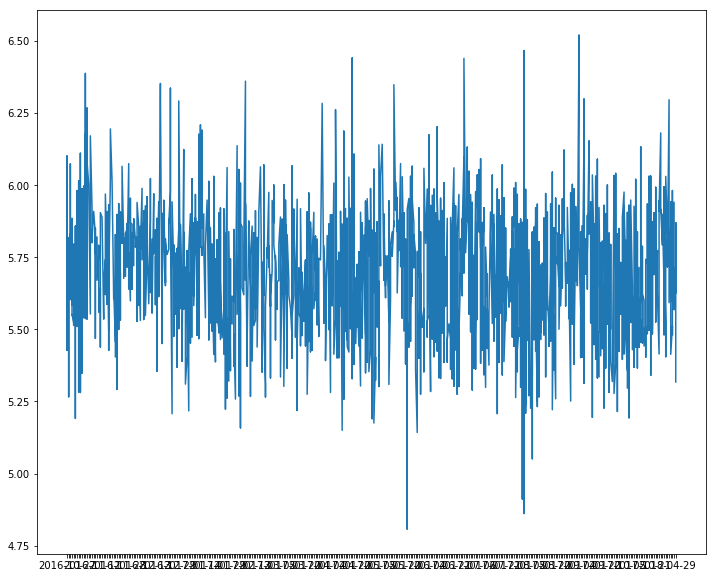

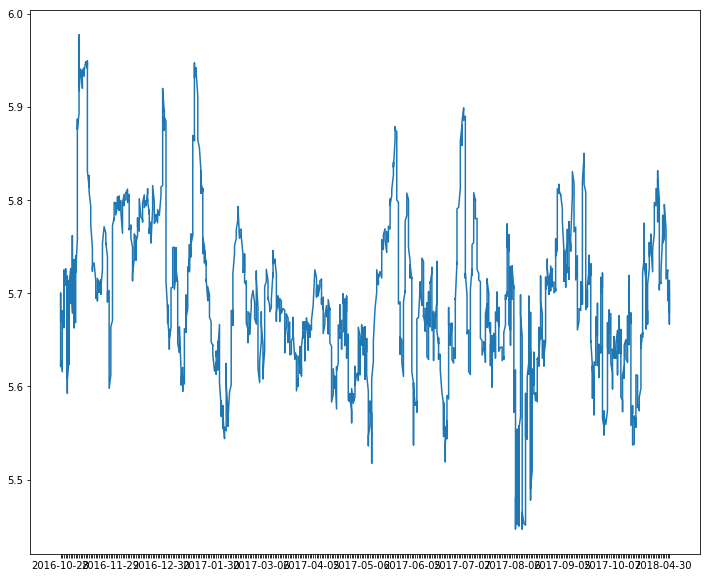

In [42]:
import matplotlib
allratios_user =allratios[allratios.user=="realDonaldTrump"].sort_values(["tweet_date"])


x=allratios_user["tweet_date"]
'''
for i in x:
    print(i)
    print(dt.datetime.strptime(i, "%Y-%m-%d"))
print(x)'''
y = allratios_user["happ_score"]

fig, ax = plt.subplots(figsize=(12,10))
plt.plot(x,y)




every_nth = 15
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

def averaged(datax,datay, n ,every_nth):
    new_x = datax[n-1:-1]
    new_y = np.zeros(len(datay)-n)
    for i in range(len(datay)-n):
        new_y[i]=np.average(datay[i:i+n])
    fig, ax = plt.subplots(figsize=(12,10))
    plt.plot(new_x,new_y)

    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.show()
    
def averaged_multi(datax,datay, n):
    new_x = datax[n-1:-1]
    new_y = np.zeros(len(datay)-n)
    for i in range(len(datay)-n):
        new_y[i]=np.average(datay[i:i+n])
    return new_x,new_y
   
        
averaged(x,y,20,30)

/Users/Winston/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


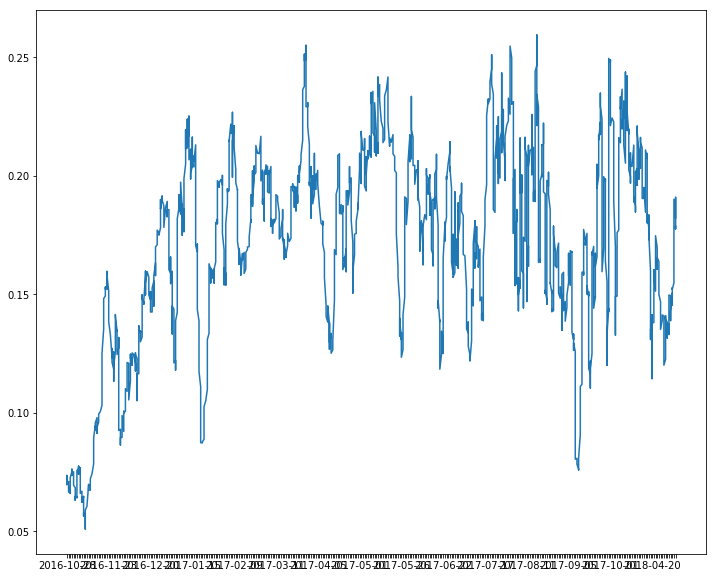

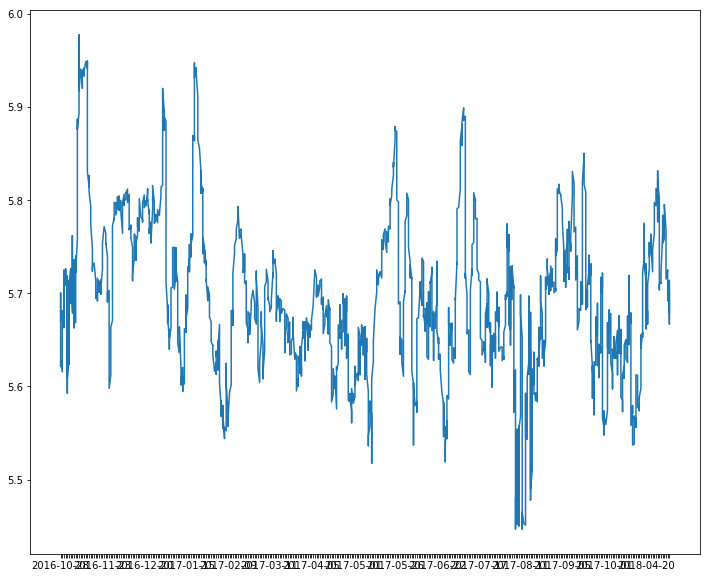

In [43]:
def convert(x):
    if type(x)== float:
        return x
    elif x[-1]=="K":
        x = float(x[:-1])
        return x*1000
    elif x[-1]=="M":
        x = float(x[:-1])
        return x*1000000
    else:
        return float(x)

ret = allratios_user['retweets']
rep = allratios_user['replies'].values
lik = allratios_user['likes']
hap = allratios_user['happ_score']

for i,z in enumerate(rep):
    if type(rep[i])!=float:
        rep[i]=convert(rep[i])
    
s = [ret,rep,lik,hap]


not_nan = np.logical_not(pd.isnull(lik))*np.logical_not(pd.isnull(hap))*np.logical_not(pd.isnull(ret))*np.logical_not(pd.isnull(rep))



ratiom = rep[not_nan]/(rep[not_nan]+lik[not_nan])
ratiom = ratiom[not_nan].astype("float32")
hap = hap[not_nan].astype("float32")


averaged(x,ratiom,20,25)
averaged(x,y,20,25)


In [44]:
def switch_time(thing):
    d=dt.datetime.strptime(thing,'%m/%d/%Y')
    return d.strftime('%Y-%m-%d')


polls = pd.read_csv('approval_topline.csv')
for i,w in enumerate(polls['modeldate'].values):
    polls['modeldate'].values[i]= switch_time(w)
print(polls)

         president   subgroup   modeldate  approve_estimate  approve_hi  \
0     Donald Trump     Voters  2018-05-10          43.78321    47.95056   
1     Donald Trump     Adults  2018-05-10          41.77017    45.70439   
2     Donald Trump  All polls  2018-05-10          41.96571    46.42638   
3     Donald Trump     Voters  2018-05-09          43.90227    48.30992   
4     Donald Trump     Adults  2018-05-09          41.68295    45.87519   
5     Donald Trump  All polls  2018-05-09          41.87370    46.47055   
6     Donald Trump     Adults  2018-05-08          41.55399    45.77575   
7     Donald Trump     Voters  2018-05-08          44.27958    48.81960   
8     Donald Trump  All polls  2018-05-08          41.90759    46.59380   
9     Donald Trump     Voters  2018-05-07          44.40765    48.99738   
10    Donald Trump  All polls  2018-05-07          42.01726    46.85077   
11    Donald Trump     Adults  2018-05-07          41.64465    46.02981   
12    Donald Trump     Vo

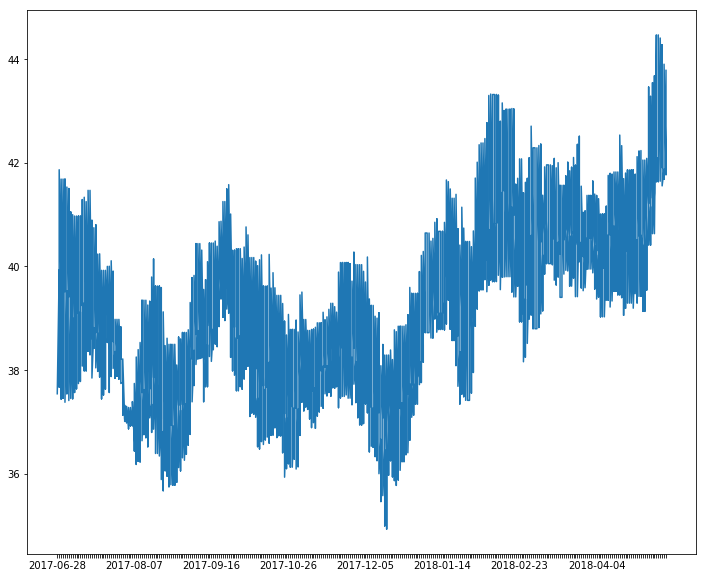

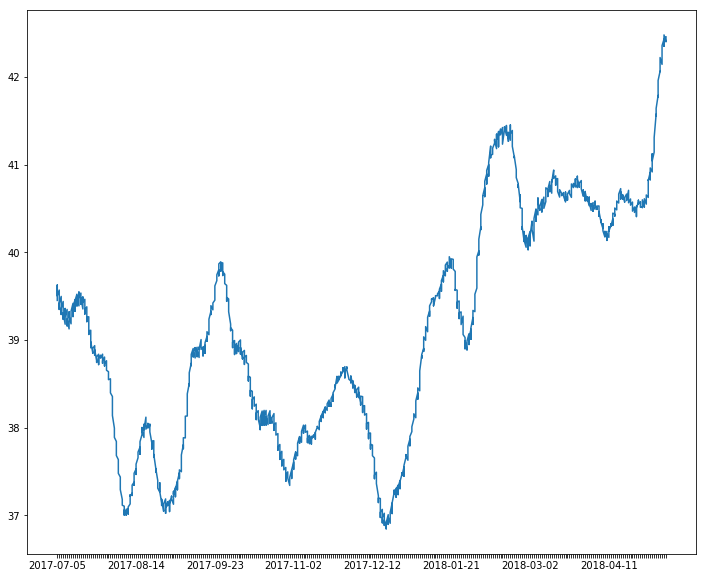

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(polls['modeldate'].values[::-1][470:],polls['approve_estimate'].values[::-1][470:])
every_nth = 40
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

averaged(polls['modeldate'].values[::-1][470:],polls['approve_estimate'].values[::-1][470:],20,40)

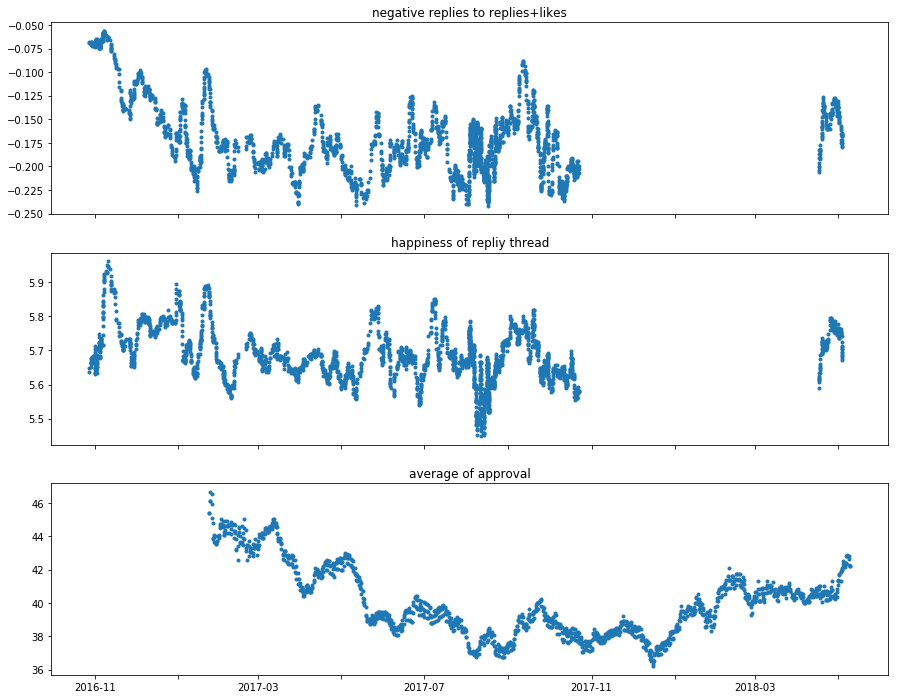

In [46]:
averaged = 30
f, (ax1, ax2, ax3)=plt.subplots(3, 1,figsize=(15,12),sharex=True)
x1,y1 = averaged_multi(x,-ratiom,averaged)
#[dt.datetime.strptime(date, '"%Y-%m-%d"').date() for date in x1]
ax1.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax1.set_title("negative replies to replies+likes")

every_nth = 15
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

        
x1,y1 = averaged_multi(x,y,averaged)
ax2.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax2.set_title("happiness of repliy thread")


every_nth = 15
for n, label in enumerate(ax2.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


    
averaged=5

x1,y1 = averaged_multi(polls['modeldate'].values[::-1],polls['approve_estimate'].values[::-1],averaged)
ax3.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax3.set_title("average of approval")  
every_nth = 2
for n, label in enumerate(ax3.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()






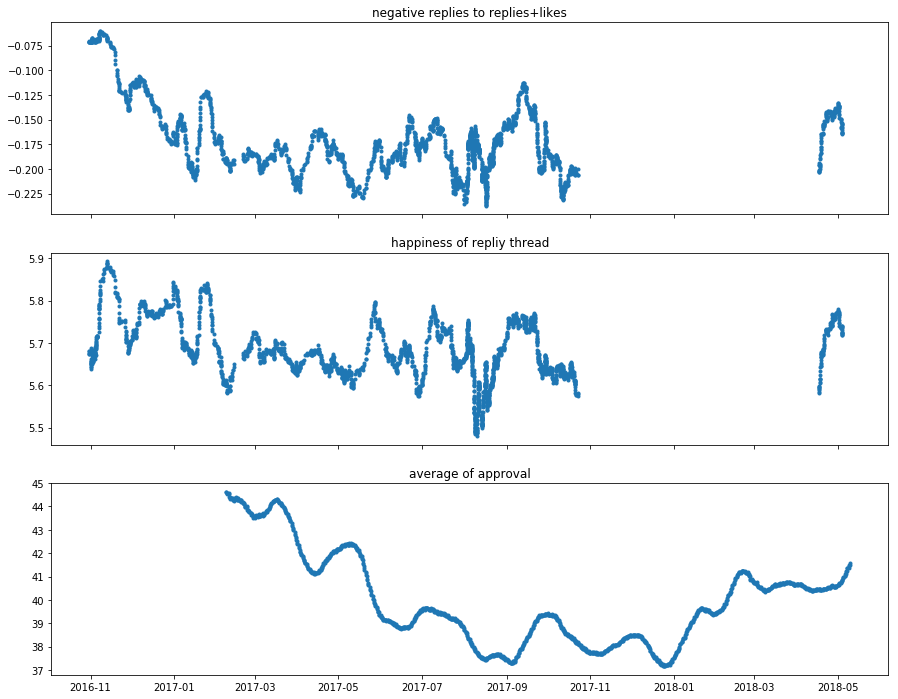

In [47]:
averaged = 50
f, (ax1, ax2, ax3)=plt.subplots(3, 1,figsize=(15,12),sharex=True)
x1,y1 = averaged_multi(x,-ratiom,averaged)
#[dt.datetime.strptime(date, '"%Y-%m-%d"').date() for date in x1]
ax1.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax1.set_title("negative replies to replies+likes")

every_nth = 1
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

        
x1,y1 = averaged_multi(x,y,averaged)
ax2.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax2.set_title("happiness of repliy thread")


every_nth = 1
for n, label in enumerate(ax2.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


    
    

x1,y1 = averaged_multi(polls['modeldate'].values[::-1],polls['approve_estimate'].values[::-1],averaged)
ax3.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax3.set_title("average of approval")  
every_nth = 1
for n, label in enumerate(ax3.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()






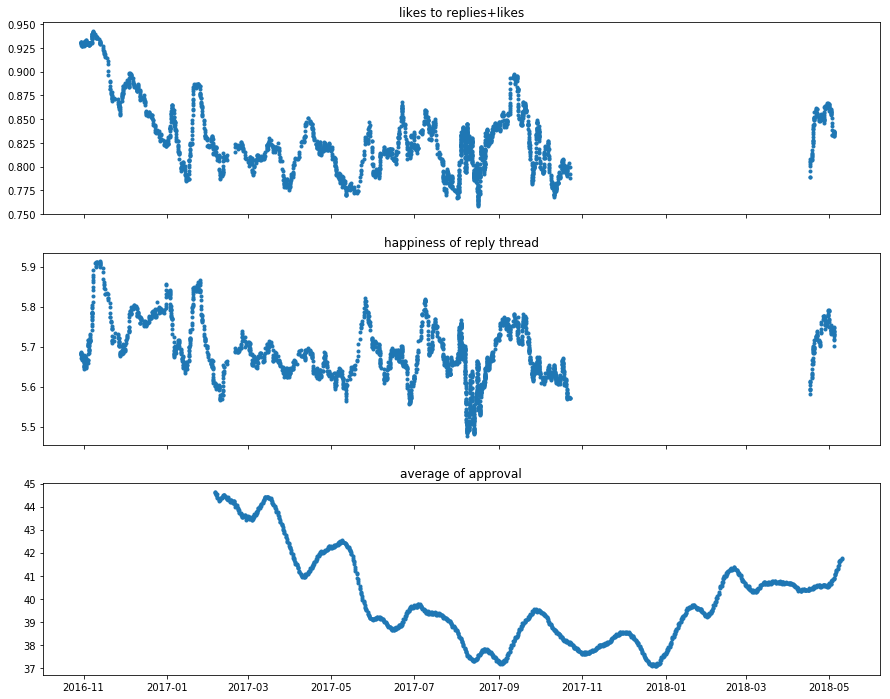

In [48]:
ratiom = lik[not_nan]/(rep[not_nan]+lik[not_nan])
ratiom = ratiom[not_nan].astype("float32")
averaged = 40
f, (ax1, ax2, ax3)=plt.subplots(3, 1,figsize=(15,12),sharex=True)
x1,y1 = averaged_multi(x,ratiom,averaged)
#[dt.datetime.strptime(date, '"%Y-%m-%d"').date() for date in x1]
ax1.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax1.set_title("likes to replies+likes")

every_nth = 1
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

        
x1,y1 = averaged_multi(x,y,averaged)
ax2.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax2.set_title("happiness of reply thread")


every_nth = 1
for n, label in enumerate(ax2.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


    
    

x1,y1 = averaged_multi(polls['modeldate'].values[::-1],polls['approve_estimate'].values[::-1],averaged)
ax3.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax3.set_title("average of approval")  
every_nth = 1
for n, label in enumerate(ax3.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()






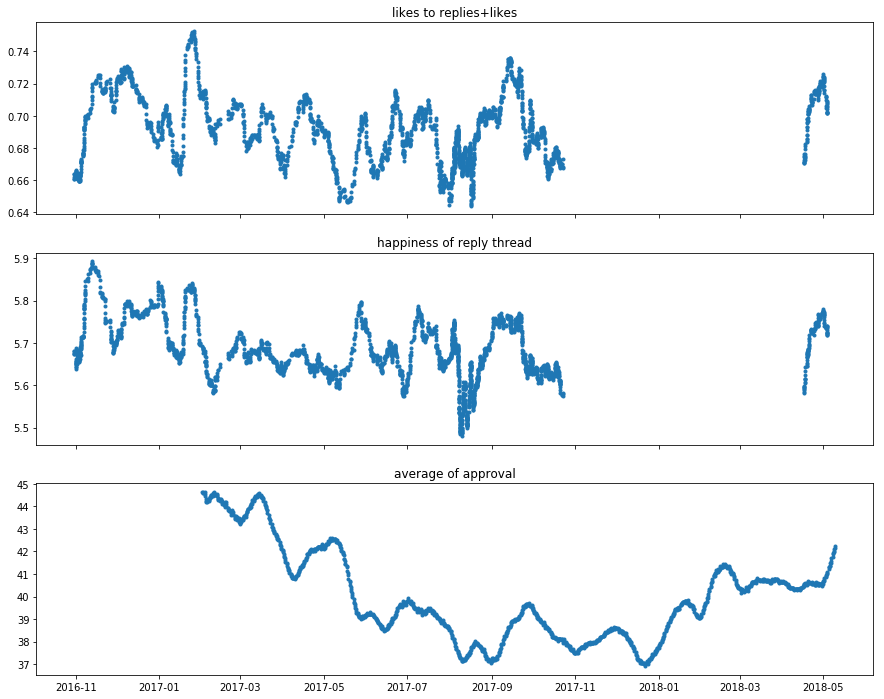

In [51]:
ratiom = lik[not_nan]/(rep[not_nan]+lik[not_nan]+ret[not_nan])
ratiom = ratiom[not_nan].astype("float32")
averaged = 50
f, (ax1, ax2, ax3)=plt.subplots(3, 1,figsize=(15,12),sharex=True)
x1,y1 = averaged_multi(x,ratiom,averaged)
#[dt.datetime.strptime(date, '"%Y-%m-%d"').date() for date in x1]
ax1.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax1.set_title("likes to replies+likes")

every_nth = 1
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

        
x1,y1 = averaged_multi(x,y,averaged)
ax2.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax2.set_title("happiness of reply thread")


every_nth = 1
for n, label in enumerate(ax2.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


    
    
averaged = 30
x1,y1 = averaged_multi(polls['modeldate'].values[::-1],polls['approve_estimate'].values[::-1],averaged)
ax3.plot([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1],y1,'.')
ax3.set_title("average of approval")  
every_nth = 1
for n, label in enumerate(ax3.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()




